In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
from google.colab import files
uploaded = files.upload()


Saving historical_data.csv to historical_data.csv


In [9]:
sentiment_df = pd.read_csv('fear_greed_index.csv')
trades_df = pd.read_csv('historical_data.csv')

In [10]:
trades_df = trades_df.dropna(subset=['Timestamp IST'])
trades_df['date'] = pd.to_datetime(trades_df['Timestamp IST'], format='%d-%m-%Y %H:%M').dt.date
sentiment_df['date'] = pd.to_datetime(sentiment_df['date']).dt.date

In [12]:
daily_metrics = trades_df.groupby(['Account', 'date']).agg(
    daily_pnl=('Closed PnL', 'sum'),
    trade_count=('Trade ID', 'count'),
    total_volume=('Size USD', 'sum'),
    wins=('Closed PnL', lambda x: (x > 0).sum())
).reset_index()

daily_metrics['win_rate'] = daily_metrics['wins'] / daily_metrics['trade_count']

In [15]:
df = pd.merge(daily_metrics, sentiment_df[['date', 'value', 'classification']], on='date', how='inner')

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [22]:
print(df.columns.tolist())

['Account', 'date', 'daily_pnl', 'trade_count', 'total_volume', 'wins', 'win_rate', 'value', 'classification']


In [23]:
df['pnl_category'] = pd.qcut(df['daily_pnl'], q=3, labels=['Low', 'Medium', 'High'])

In [24]:
df['target_pnl_bucket'] = df['pnl_category'].shift(-1)

In [25]:
features = ['value', 'trade_count', 'win_rate', 'total_volume']

In [26]:
df_model = df[features + ['target_pnl_bucket']].dropna()

X = df_model[features]
y = df_model['target_pnl_bucket']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)

print(f"Model trained! Accuracy: {clf.score(X_test, y_test):.2%}")

Model trained! Accuracy: 48.72%


In [28]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [29]:
behavior_cols = ['total_volume', 'win_rate', 'trade_count']
scaler = StandardScaler()
scaled_behavior = scaler.fit_transform(df[behavior_cols].fillna(0))

In [30]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['archetype_id'] = kmeans.fit_predict(scaled_behavior)

In [31]:
print(df.groupby('archetype_id')[behavior_cols].mean())

              total_volume  win_rate  trade_count
archetype_id                                     
0             3.342955e+05  0.715320    83.579957
1             1.029359e+07  0.421823  1033.333333
2             2.162043e+05  0.108977    54.959108


In [34]:
!pip install streamlit plotly
import streamlit as st
import plotly.express as px

st.title("Hyperliquid Trader Analysis")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 75.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 97.6 MB/s eta 0:00:00


2026-02-03 20:01:36.209 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-03 20:01:36.314 
  command:

    streamlit run /usr/local/lib/python3.12/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2026-02-03 20:01:36.315 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-03 20:01:36.315 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

In [35]:
st.title("Hyperliquid Trader Analysis")

2026-02-03 20:02:48.828 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-03 20:02:48.829 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-03 20:02:48.830 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

In [37]:
fig = px.scatter(df, x='value', y='daily_pnl', color='pnl_category',
                 title="Sentiment Score vs Daily PnL",
                 labels={'value': 'Fear & Greed Index', 'daily_pnl': 'PnL ($)'})

st.plotly_chart(fig)



2026-02-03 20:04:11.867 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-03 20:04:11.868 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-03 20:04:11.871 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-03 20:04:11.875 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-03 20:04:11.877 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

In [38]:
st.subheader("Trader Archetype Breakdown")
st.write(df.groupby('archetype_id')[['daily_pnl', 'win_rate']].mean())

2026-02-03 20:06:25.263 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-03 20:06:25.268 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-03 20:06:25.273 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-03 20:06:25.290 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-03 20:06:25.292 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-03 20:06:25.296 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


/tmp/ipython-input-152566682.py:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




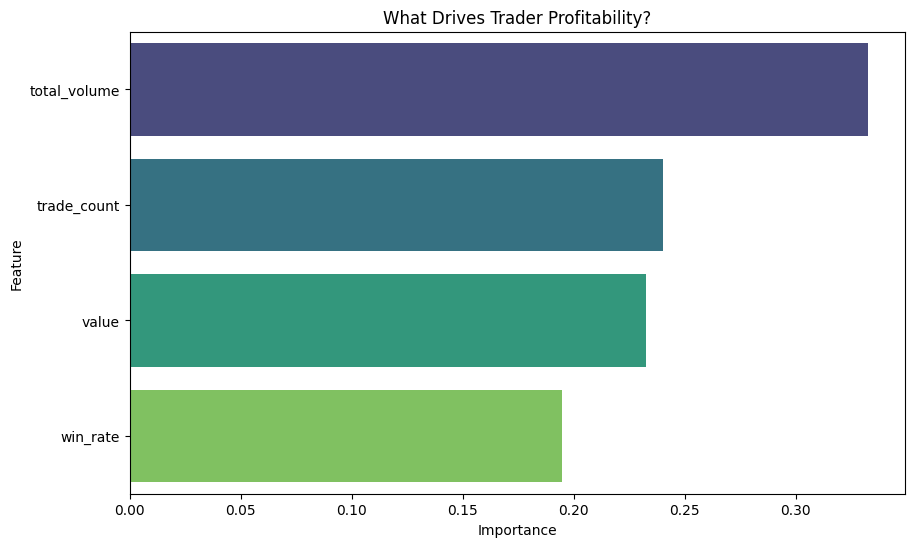

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns


importances = clf.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('What Drives Trader Profitability?')
plt.show()